In [26]:
import pandas as pd
# TOkenize the data and remove the stop words and lemmatize the data
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re


# Read the data
data = pd.read_csv('./data/deceptive-opinion.csv')
data.head()

,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...


In [17]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/dosisiddhesh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/dosisiddhesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/dosisiddhesh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Tokenize the data 

1. split the data to get the words
2. remove the stop words
3. remove the punctuation
4. remove the numbers
5. lammatize the words (preferring lemmatization over stemming as it gives the root word)



In [27]:
lemmatizer = WordNetLemmatizer() # lemmatizing the words
def apply_tokenization(text):

    text = text.lower() # converting the text to lower case

    words = nltk.word_tokenize(text)   # splitting the text into words

    stop_words = set(stopwords.words('english')) # getting the stop words in english

    tokens = [word for word in words if word.isalpha()] # removing the punctuations from the text or getting only alpha-words

    non_stop_words = [word for word in tokens if not word in stop_words] # removing the stop words from the text 

    lemmatized_words = [lemmatizer.lemmatize(word) for word in non_stop_words] # lemmatizing the words

    return " ".join(lemmatized_words) # joining the words to form a sentence


data['tokenized_data'] = data['text'].apply(apply_tokenization) # applying the function to the text column


In [29]:
data.head()

,deceptive,hotel,polarity,source,text,tokenized_data
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...,We stayed one night getaway family thursday Tr...
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...,Triple A rate upgrade view room le also includ...
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...,This come little late I finally catching revie...
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...,The Omni Chicago really delivers front spaciou...
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...,I asked high floor away elevator I got The roo...


In [33]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 24.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 2.1 MB/s eta 0:00:00


In [74]:
# Now we have the tokenized data in the tokenized_data column

# create embeddings for the data using the word2vec model from gensim

from gensim.models import Word2Vec
import numpy as np

# create a list of sentences from the tokenized data
sentences = [nltk.word_tokenize(sentence) for sentence in data['tokenized_data']]
# create the word2vec model
model = Word2Vec(sentences, min_count=1, vector_size=100, sg=0)
# get the vocabulary of the model
words = model.wv.key_to_index.keys()

# save the model
model.save('word2vec.model')

print("Vocab size", len(words))





Vocab size 9601


(1280,) (1280,)
(320,) (320,)


In [133]:
# get the embedding for the sentence

def get_embedding(sentence):
    # get the tokens from the sentence
    tokens = nltk.word_tokenize(sentence)
    # get the embedding for each word in the sentence
    embeddings = [model.wv[word] for word in tokens]
    # get the mean of the embeddings
    mean_embedding = np.mean(embeddings, axis=0)
    return mean_embedding

sample_sentences = data['tokenized_data'][:5]
sample_embeddings = [get_embedding(sentence) for sentence in sample_sentences]
[len(sample) for sample in sample_embeddings]




[100, 100, 100, 100, 100]

In [136]:
data['text_embedding'][:] = data['tokenized_data'].apply(get_embedding)

In [137]:
data['deceptive'].unique()

array(['truthful', 'deceptive'], dtype=object)

In [150]:
data['deceptive']   = data['deceptive'].map({'truthful': 0, 'deceptive': 1})


In [151]:
data.head()

,deceptive,hotel,polarity,source,text,tokenized_data,text_embedding
0,0,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...,We stayed one night getaway family thursday Tr...,"[-0.25228962, 0.32827875, 0.16013923, -0.03176..."
1,0,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...,Triple A rate upgrade view room le also includ...,"[-0.3095798, 0.27282536, 0.0984986, -0.0279076..."
2,0,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...,This come little late I finally catching revie...,"[-0.24866305, 0.42117742, 0.23038754, -0.06015..."
3,0,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...,The Omni Chicago really delivers front spaciou...,"[-0.29247844, 0.3350744, 0.14200926, -0.009875..."
4,0,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...,I asked high floor away elevator I got The roo...,"[-0.3409508, 0.44184422, 0.21863651, -0.040022..."


In [152]:
data['deceptive'].value_counts()

deceptive
0    800
1    800
Name: count, dtype: int64

In [153]:
# split the data into train and test
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2, random_state=42)

train.shape, test.shape

((1280, 7), (320, 7))

In [154]:
# get the X_train, y_train, X_test, y_test
X_train = np.array(train['text_embedding'].tolist())
y_train = np.array(train['deceptive'].tolist())

X_test = np.array(test['text_embedding'].tolist())
y_test = np.array(test['deceptive'].tolist())

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1280, 100), (1280,), (320, 100), (320,))

In [149]:
X_test[0]

array([-0.23251876,  0.34558403,  0.17939286, -0.05452656,  0.01092047,
       -0.46671936,  0.08802488,  0.8613286 , -0.63835007, -0.11656233,
       -0.19329281, -0.2469087 , -0.04060498,  0.2510431 ,  0.08089521,
       -0.4478726 ,  0.05753947, -0.3807462 , -0.5150138 , -0.87865   ,
        0.3053848 , -0.1496235 ,  0.37376338, -0.13702801,  0.02585615,
       -0.36312893, -0.24858196, -0.21091212, -0.21071927,  0.10305212,
        0.40479097,  0.23771653,  0.15597565,  0.007838  ,  0.01057314,
        0.48726305,  0.31075245, -0.3516186 , -0.23763035, -0.8284232 ,
        0.03637373, -0.5755979 , -0.04678076, -0.04407656, -0.02198782,
       -0.22541533, -0.33454275,  0.07067322,  0.05653695,  0.13745788,
        0.25094846, -0.22943646, -0.04505318, -0.15943721, -0.25864252,
        0.07345174,  0.10310505,  0.05026377, -0.21927182,  0.09214215,
        0.01260713,  0.08696251,  0.05088932, -0.04490311, -0.5331158 ,
        0.18002804,  0.22233163,  0.06039051, -0.6549212 ,  0.62

In [155]:
y_test[0]

1

# creating the model

In [167]:
def get_scores(y, y_pred):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    print("Accuracy: ", accuracy_score(y, y_pred))
    print("Precision: ", precision_score(y, y_pred))
    print("Recall: ", recall_score(y, y_pred))
    print("F1: ", f1_score(y, y_pred))

In [168]:
# ref: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

# plot the confusion matrix

def plot_cm(y_test, y_pred):
    import matplotlib.pyplot as plt
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_)
    disp.plot()
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.show()
    plt.show()

## 1. Logistic Regression

----------- Train Scores ------------
Accuracy:  0.69609375
Precision:  0.7072
Recall:  0.6820987654320988
F1:  0.6944226237234878
----------- Test Scores ------------
Accuracy:  0.7
Precision:  0.6647058823529411
Recall:  0.743421052631579
F1:  0.701863354037267


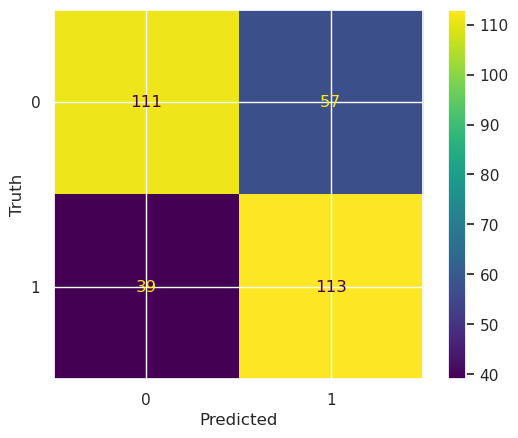

In [170]:
# create the model

from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()

lr_model.fit(X_train, y_train)

# get the predictions

y_pred = lr_model.predict(X_test)

# get the scores
print("----------- Train Scores ------------")
get_scores(y_train, lr_model.predict(X_train))
print("----------- Test Scores ------------")
get_scores(y_test, y_pred)


plot_cm(y_test, y_pred) 

## 2. SVM

----------- Train Scores ------------
Accuracy:  0.93046875
Precision:  0.9333333333333333
Recall:  0.9290123456790124
F1:  0.9311678267594741
----------- Test Scores ------------
Accuracy:  0.6625
Precision:  0.6134020618556701
Recall:  0.7828947368421053
F1:  0.6878612716763006


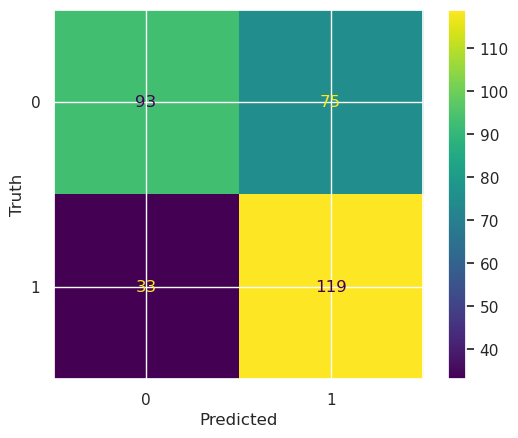

In [180]:
# use the svm model

from sklearn.svm import SVC
svm_model = SVC(gamma=200)
svm_model.fit(X_train, y_train)

# get the predictions
y_pred = svm_model.predict(X_test)

# get the scores
print("----------- Train Scores ------------")
get_scores(y_train, svm_model.predict(X_train))
print("----------- Test Scores ------------")
get_scores(y_test, y_pred)

plot_cm(y_test, y_pred)


> The above model been overfitted !!!


----------- Train Scores ------------
Accuracy:  0.72734375
Precision:  0.7195301027900147
Recall:  0.7561728395061729
F1:  0.7373965387509406
----------- Test Scores ------------
Accuracy:  0.709375
Precision:  0.656084656084656
Recall:  0.8157894736842105
F1:  0.7272727272727273


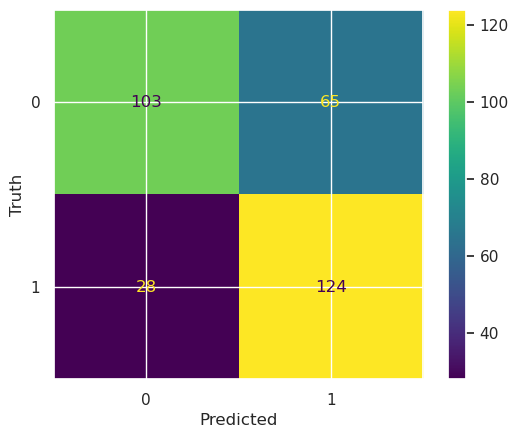

In [181]:
# use the svm model

from sklearn.svm import SVC
svm_model = SVC(gamma=10)
svm_model.fit(X_train, y_train)

# get the predictions
y_pred = svm_model.predict(X_test)

# get the scores
print("----------- Train Scores ------------")
get_scores(y_train, svm_model.predict(X_train))
print("----------- Test Scores ------------")
get_scores(y_test, y_pred)

plot_cm(y_test, y_pred)


## 3. Random Forest Classifier

----------- Train Scores ------------
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1:  1.0
----------- Test Scores ------------
Accuracy:  0.68125
Precision:  0.631578947368421
Recall:  0.7894736842105263
F1:  0.7017543859649122


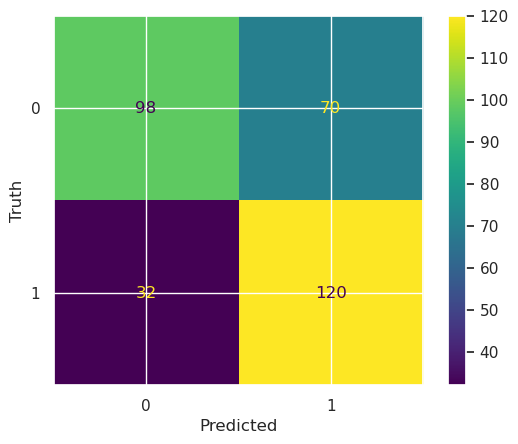

In [186]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, max_depth=20 )
rf_model.fit(X_train, y_train)

# get the predictions
y_pred = rf_model.predict(X_test)

# get the scores
print("----------- Train Scores ------------")
get_scores(y_train, rf_model.predict(X_train))
print("----------- Test Scores ------------")
get_scores(y_test, y_pred)

plot_cm(y_test, y_pred)

> we can clear see the random forest is overfitted

## 4. KNN

----------- Train Scores ------------
Accuracy:  0.77421875
Precision:  0.7651403249630724
Recall:  0.7993827160493827
F1:  0.7818867924528302
----------- Test Scores ------------
Accuracy:  0.659375
Precision:  0.6228571428571429
Recall:  0.7171052631578947
F1:  0.6666666666666667


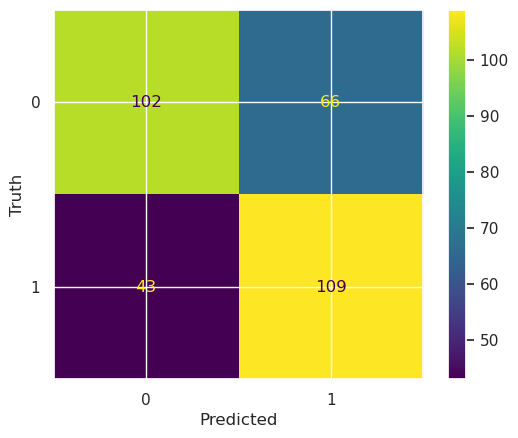

In [187]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# get the predictions
y_pred = knn_model.predict(X_test)

# get the scores
print("----------- Train Scores ------------")
get_scores(y_train, knn_model.predict(X_train))
print("----------- Test Scores ------------")
get_scores(y_test, y_pred)

plot_cm(y_test, y_pred)


# tf-idf

data.head()

In [189]:
data.head()

,deceptive,hotel,polarity,source,text,tokenized_data,text_embedding
0,0,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...,We stayed one night getaway family thursday Tr...,"[-0.25228962, 0.32827875, 0.16013923, -0.03176..."
1,0,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...,Triple A rate upgrade view room le also includ...,"[-0.3095798, 0.27282536, 0.0984986, -0.0279076..."
2,0,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...,This come little late I finally catching revie...,"[-0.24866305, 0.42117742, 0.23038754, -0.06015..."
3,0,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...,The Omni Chicago really delivers front spaciou...,"[-0.29247844, 0.3350744, 0.14200926, -0.009875..."
4,0,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...,I asked high floor away elevator I got The roo...,"[-0.3409508, 0.44184422, 0.21863651, -0.040022..."


In [213]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
# create the tfidf model
tfidf = TfidfVectorizer()
x= data['tokenized_data']
# fit the model on the tokenized data
tfidf.fit(x)
# get the vocabulary of the model
embeddings = tfidf.fit_transform(data['tokenized_data'])
words = tfidf.get_feature_names_out()
print("Vocab size", len(words))
# save the model
pickle.dump(tfidf, open('./model/tfidf.model', 'wb'))

Vocab size 8296


In [214]:
embeddings.shape

(1600, 8296)

In [219]:
embeddings[0].toarray()

array([[0.18394488, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
# copy the embeddings to the data frame['text_embedding']

for i in range(embeddings.shape[0]):
    data['text_embedding'][i] = embeddings[i].toarray()[0]
    

In [223]:
data

,deceptive,hotel,polarity,source,text,tokenized_data,text_embedding
0,0,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...,We stayed one night getaway family thursday Tr...,"[0.1839448830021706, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,0,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...,Triple A rate upgrade view room le also includ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,0,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...,This come little late I finally catching revie...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0771380358939..."
3,0,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...,The Omni Chicago really delivers front spaciou...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,0,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...,I asked high floor away elevator I got The roo...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...
1595,1,intercontinental,negative,MTurk,Problems started when I booked the InterContin...,Problems started I booked InterContinental Chi...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1596,1,amalfi,negative,MTurk,The Amalfi Hotel has a beautiful website and i...,The Amalfi Hotel beautiful website interior de...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1597,1,intercontinental,negative,MTurk,The Intercontinental Chicago Magnificent Mile ...,The Intercontinental Chicago Magnificent Mile ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1598,1,palmer,negative,MTurk,"The Palmer House Hilton, while it looks good i...",The Palmer House Hilton look good picture outs...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
